In [3]:
import numpy as np

### Numpy Array Vs Python List

#### Speed Test

In [8]:
# python list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]
c = []
import time
start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time() - start)

2.092193126678467


In [9]:
import numpy as np
arr1 = np.arange(10000000)
arr2 = np.arange(10000000,20000000)
start = time.time()
arr3 = arr1 + arr2
print(time.time() - start)

0.018781423568725586


#### Memory Test

In [14]:
a = [i for i in range(10000000)]
import sys
sys.getsizeof(a)

89095160

In [15]:
b = np.arange(10000000)
sys.getsizeof(b)

40000112

In [16]:
b = np.arange(10000000,dtype=np.int16)
sys.getsizeof(b)

20000112

In [17]:
b = np.arange(10000000,dtype=np.int8)
sys.getsizeof(b)

10000112

### Advanced Indexing

#### Fancy Indexing
Fancy indexing in NumPy refers to the technique of using arrays of indices to access or modify elements in another array.

In [20]:
# fancy indexing
arr = np.arange(36).reshape(6,6)
arr

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

lets say i want to select row 1,2,4,6. In this case normal indexing will not work because there is no pattern to access these rows so i can use fancy indexing and just passing index of rows which i have to access.

In [21]:
arr[[0,1,3,5]]

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [18, 19, 20, 21, 22, 23],
       [30, 31, 32, 33, 34, 35]])

In [23]:
# for columns
arr[:,[0,1,3]]

array([[ 0,  1,  3],
       [ 6,  7,  9],
       [12, 13, 15],
       [18, 19, 21],
       [24, 25, 27],
       [30, 31, 33]])

#### Boolean Indexing
Boolean indexing in NumPy is a powerful technique that allows you to select elements from an array using a boolean condition. It involves creating a boolean mask, an array of True and False values

In [26]:
# random number array bet 1 to 100
arr = np.random.randint(1,100,36).reshape(6,6)
arr

array([[15, 37, 78, 59, 85, 42],
       [86, 21, 48, 96, 74, 50],
       [29, 33, 93, 30, 96, 80],
       [83, 14, 64, 26, 54, 79],
       [ 9, 70, 72, 31, 18, 50],
       [49, 78, 57, 66, 33, 99]])

##### 1. find all numbers greater than 50

In [27]:
arr > 50

array([[False, False,  True,  True,  True, False],
       [ True, False, False,  True,  True, False],
       [False, False,  True, False,  True,  True],
       [ True, False,  True, False,  True,  True],
       [False,  True,  True, False, False, False],
       [False,  True,  True,  True, False,  True]])

In [28]:
arr[arr>50]

array([78, 59, 85, 86, 96, 74, 93, 96, 80, 83, 64, 54, 79, 70, 72, 78, 57,
       66, 99])

##### 2. find out even numbers

In [30]:
arr[arr % 2 == 0]

array([78, 42, 86, 48, 96, 74, 50, 30, 96, 80, 14, 64, 26, 54, 70, 72, 18,
       50, 78, 66])

##### 3. find all numbers greater than 50 and are even

In [31]:
arr[(arr>50) & (arr%2==0)]

array([78, 86, 96, 74, 96, 80, 64, 54, 70, 72, 78, 66])

##### 4. find all numbers divisible by 7

In [32]:
arr[arr % 7 == 0]

array([42, 21, 14, 70, 49])

##### 5. Find all numbers that are multiples of 5

In [33]:
arr[arr%5==0]

array([15, 85, 50, 30, 80, 70, 50])

##### 6. Find all numbers whose square is Less than 100:

In [35]:
arr[arr**2 < 100]

array([9])

### Broadcasting
- The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.
- The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [38]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [39]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)
print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

#### Brodcasting Examples

In [47]:
a = np.arange(12).reshape(4,3)
b = np.arange(3)
print(a)
print(b)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [41]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [42]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)
print(a)
print(b)
print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [43]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
print(a)
print(b)
print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [44]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
print(a)
print(b)
print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [45]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [46]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Useful Mathematical Function

#### Sigmoid Function
- The sigmoid function is a mathematical function that maps any real-valued number to a value between 0 and 1. 
- It is often used in machine learning, particularly in logistic regression and neural networks, as an activation function.
- The formula for the sigmoid function is:

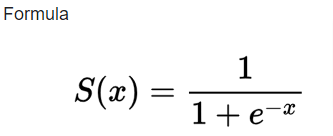

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

In [11]:
arr = np.random.randint(1,100,9).reshape(3,3)
print(arr)
sigmoid(arr)

[[ 4 99 14]
 [66 24 69]
 [45  6  5]]


array([[0.98201379, 1.        , 0.99999917],
       [1.        , 1.        , 1.        ],
       [1.        , 0.99752738, 0.99330715]])

#### Mean Square Error MSE Function
- Mean Squared Error (MSE) is a common loss function used in regression problems to measure the average squared difference between the predicted values and the actual values.

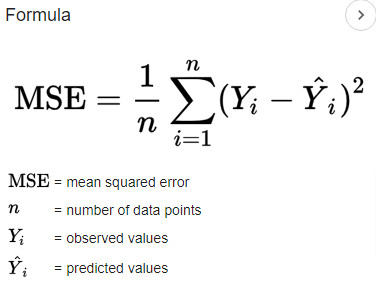

In [12]:
def mse(actual,predicted):
    result = np.mean((actual-predicted)**2)
    return result

In [13]:
actual = np.random.randint(1,100,36).reshape(6,6)
predicted = np.random.randint(100,200,36).reshape(6,6)
mse(actual,predicted)

12128.305555555555

#### Binary Cross Entropy
- Binary Cross-Entropy (BCE), also known as log loss, is a loss function used primarily in binary classification tasks.
- It measures the performance of a classification model whose output is a probability value between 0 and 1. 

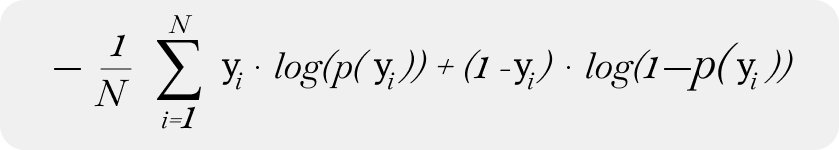

In [14]:
def binary_crossentropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    bce = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return bce

In [15]:
y_true = np.array([1, 0, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.2])
binary_crossentropy(y_true, y_pred)

0.164252033486018

**Note:** <br>
Clipping: The np.clip function ensures that predicted probabilities are within the range [1e-15, 1 - 1e-15] to avoid taking the log of 0 or 1, which would result in infinite or undefined values.

### Working with Missing Values 

In [16]:
arr = np.array([0,1,2,3,4,5,np.nan,6,7,np.nan,9])
print(arr)

[ 0.  1.  2.  3.  4.  5. nan  6.  7. nan  9.]


In [19]:
arr[~np.isnan(arr)]

array([0., 1., 2., 3., 4., 5., 6., 7., 9.])

### Plotting Graphs

#### x = y

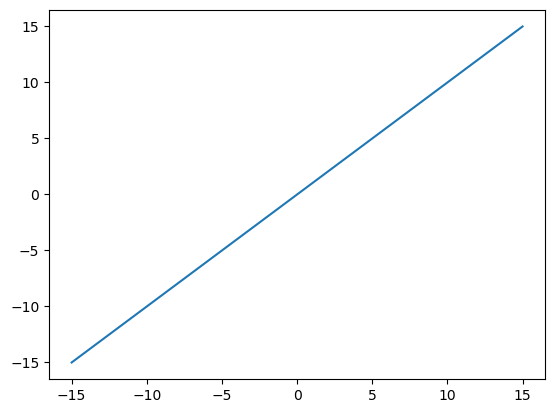

In [27]:
import matplotlib.pyplot as plt
x = np.linspace(-15,15,100)
y = x
plt.plot(x,y)

#### y = x^2

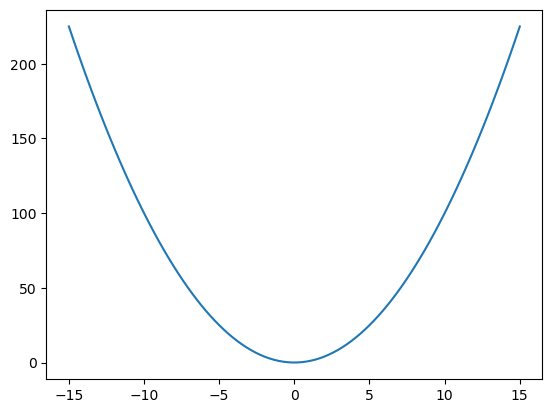

In [28]:
x = np.linspace(-15,15,100)
y = x ** 2
plt.plot(x,y)

#### y = sin(x)

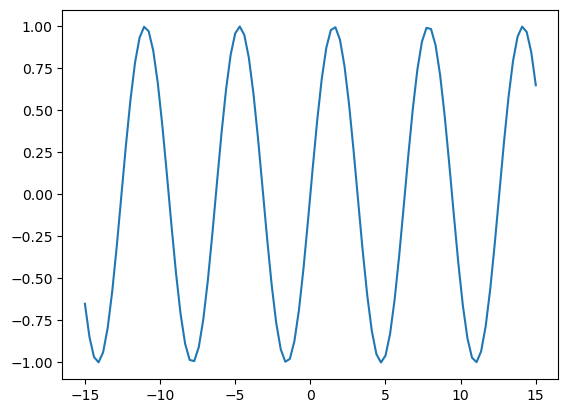

In [29]:
x = np.linspace(-15,15,100)
y = np.sin(x)
plt.plot(x,y)

#### y = cos(x)

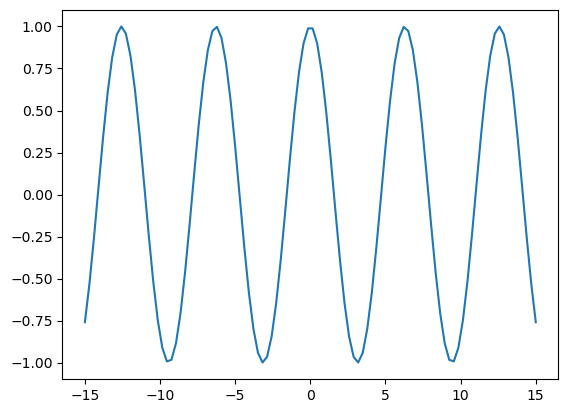

In [30]:
x = np.linspace(-15,15,100)
y = np.cos(x)
plt.plot(x,y)

#### y = tan(x)

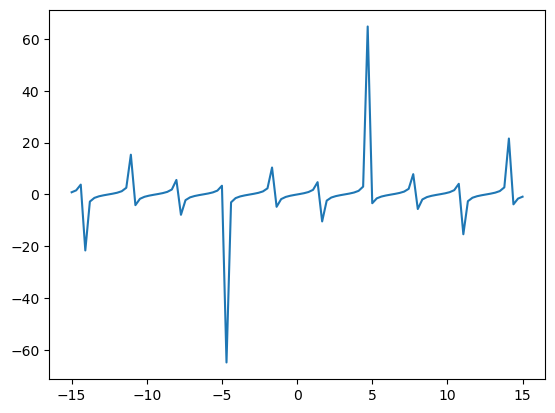

In [33]:
x = np.linspace(-15,15,100)
y = np.tan(x)
plt.plot(x,y)

#### y = x.log(x)

C:\Users\huzai\AppData\Local\Temp\ipykernel_8456\2033742291.py:2: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


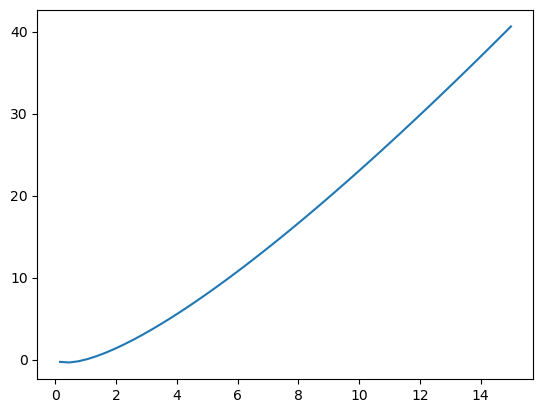

In [34]:
x = np.linspace(-15,15,100)
y = x * np.log(x)
plt.plot(x,y)

#### sigmoid

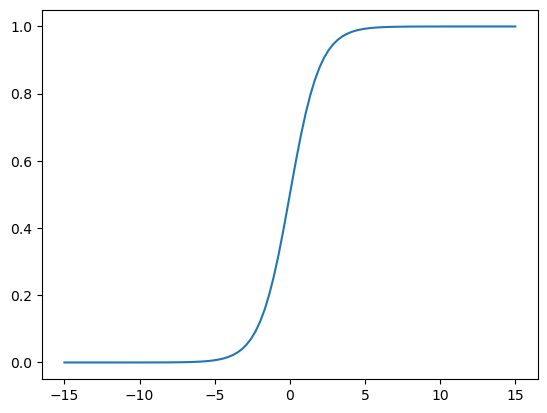

In [36]:
x = np.linspace(-15,15,100)
y = 1/(1+np.exp(-(x)))
plt.plot(x,y)

#### y= sqrt{x}

C:\Users\huzai\AppData\Local\Temp\ipykernel_8456\3340550583.py:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(x)


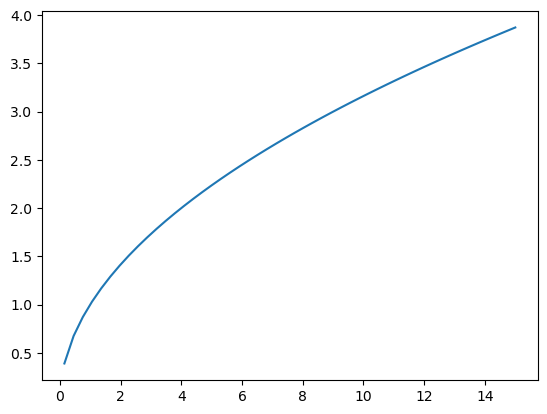

In [38]:
x = np.linspace(-15,15,100)
y = np.sqrt(x)
plt.plot(x,y)

#### y = 1 / x

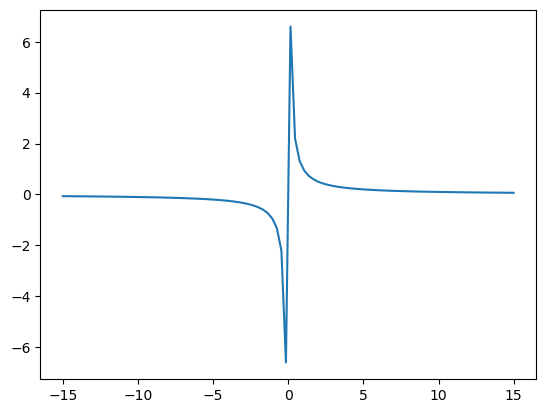

In [39]:
x = np.linspace(-15,15,100)
y = 1/x
plt.plot(x,y)

#### y = 1/x^2

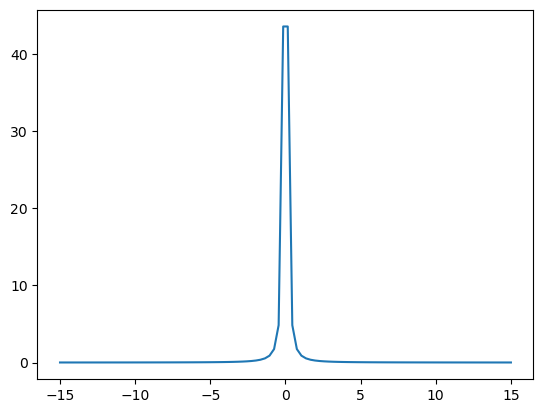

In [40]:
x = np.linspace(-15,15,100)
y = 1/x**2
plt.plot(x,y)